In [58]:
import pandas as pd

# importing .csv file
df = pd.read_csv("IMDB-Movie-Data.csv",index_col="Title")

# getting the first 10 rows
df.head(10)

,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
Suicide Squad,5,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
The Great Wall,6,"Action,Adventure,Fantasy",European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,45.13,42.0
La La Land,7,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.06,93.0
Mindhorn,8,Comedy,A has-been actor best known for playing the ti...,Sean Foley,"Essie Davis, Andrea Riseborough, Julian Barrat...",2016,89,6.4,2490,NaN,71.0
The Lost City of Z,9,"Action,Adventure,Biography","A true-life drama, centering on British explor...",James Gray,"Charlie Hunnam, Robert Pattinson, Sienna Mille...",2016,141,7.1,7188,8.01,78.0


In [59]:
# getting some insights about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, Guardians of the Galaxy to Nine Lives
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Genre               1000 non-null   object 
 2   Description         1000 non-null   object 
 3   Director            1000 non-null   object 
 4   Actors              1000 non-null   object 
 5   Year                1000 non-null   int64  
 6   Runtime (Minutes)   1000 non-null   int64  
 7   Rating              1000 non-null   float64
 8   Votes               1000 non-null   int64  
 9   Revenue (Millions)  872 non-null    float64
 10  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(4)
memory usage: 93.8+ KB


In [60]:
# replacing Revenue and Metascore null values with their mean
df["Revenue (Millions)"].fillna(df["Revenue (Millions)"].mean(),inplace=True)
df["Metascore"].fillna(df["Metascore"].mean(),inplace=True)
df.isnull().sum()

Rank                  0
Genre                 0
Description           0
Director              0
Actors                0
Year                  0
Runtime (Minutes)     0
Rating                0
Votes                 0
Revenue (Millions)    0
Metascore             0
dtype: int64

Text(0.5, 1.0, 'Top 10 Directors with most movies')

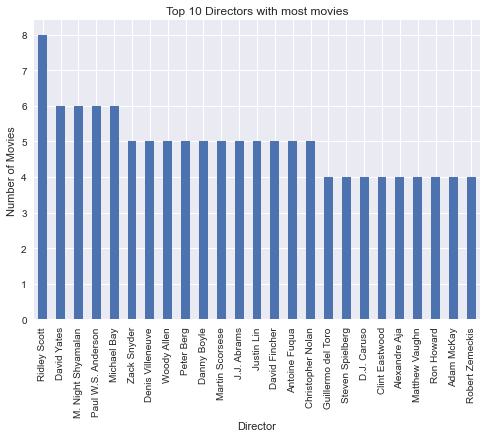

In [61]:
import matplotlib.pyplot as plt

# style of the plot
plt.style.use("seaborn")


# top 10 directors with most movies
df["Director"].value_counts().head(25).plot(kind="bar")

# key of plot 
plt.xlabel("Director")
plt.ylabel("Number of Movies")
plt.title("Top 10 Directors with most movies")

# insight: Riddley Scott has directed most movies

Text(0.5, 1.0, 'Number of Movies Released Year by Year')

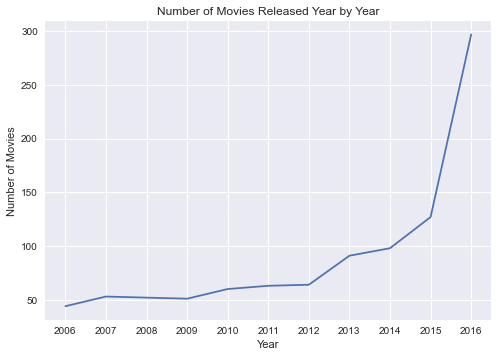

In [62]:
# number of movie released year by year
df["Year"].value_counts().sort_index().plot()

# show more years
plt.xticks(range(2006,2017))

plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.title("Number of Movies Released Year by Year")

# insight: the number of movies keeps increasing year by year with 2016 being the highest

Text(0.5, 1.0, 'Top 10 Movie Genres')

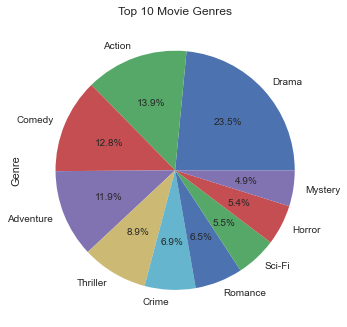

In [63]:
# top 10 most movie genres
# first we need to split the genres, then count them, then get the top 10, then plot them
df["Genre"].str.split(",").explode().value_counts(normalize=True).head(10).plot(kind="pie", autopct="%1.1f%%")

plt.title("Top 10 Movie Genres")

# insight: Drama is the most common genre in movies

Text(0.5, 1.0, 'Rating vs Revenue')

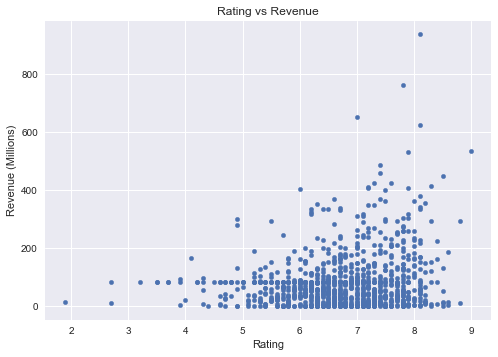

In [64]:
# relation between rating and revenue
df.plot(x="Rating",y="Revenue (Millions)",kind="scatter")

plt.xlabel("Rating")
plt.ylabel("Revenue (Millions)")
plt.title("Rating vs Revenue")

# insight: movies with low rating have low revenue and movies with high rating have high revenue but there are some exceptions
# which means that rating is not the only factor that affects the revenue

Text(0.5, 1.0, 'Rating vs Metascore')

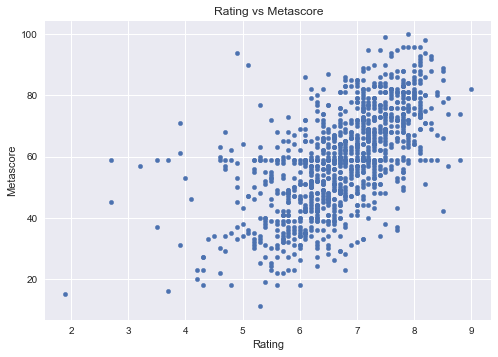

In [65]:
# relation between rating and metascore
df.plot(x="Rating",y="Metascore",kind="scatter")

plt.xlabel("Rating")
plt.ylabel("Metascore")
plt.title("Rating vs Metascore")

# insight: movies with high rating have high metascore, relatively movies with low rating have low metascore
# which means that rating is the most important factor that affects the metascore

Text(0.5, 1.0, 'Rating vs Runtime')

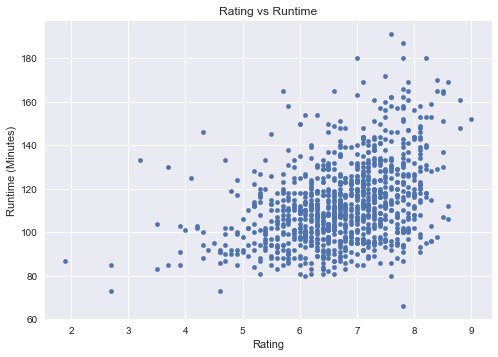

In [66]:
# relation between rating and runtime
df.plot(x="Rating",y="Runtime (Minutes)",kind="scatter")

plt.xlabel("Rating")
plt.ylabel("Runtime (Minutes)")
plt.title("Rating vs Runtime")

# insight: movies with high rating have high runtime, which means people like long movies

Text(0.5, 1.0, 'Votes vs Rating')

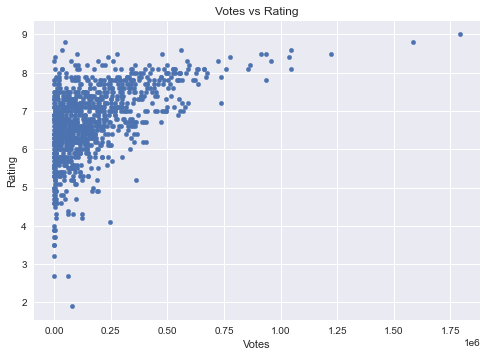

In [67]:
# relation between votes and rating
df.plot(x="Votes",y="Rating",kind="scatter")

plt.xlabel("Votes")
plt.ylabel("Rating")
plt.title("Votes vs Rating")

# insight: movies with high votes have high rating which means people mostly vote for movies they like

Text(0.5, 1.0, 'Votes vs Rank')

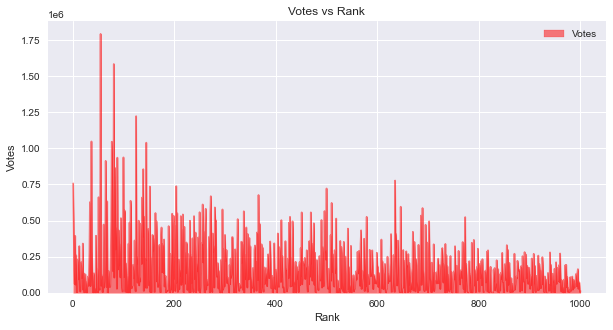

In [68]:
# relation between rank and votes
df.plot(x="Rank",y="Votes",kind="area",figsize=(10,5),color="red",alpha=0.5)

plt.xlabel("Rank")
plt.ylabel("Votes")
plt.title("Votes vs Rank")

# insight: movies with high rank (the lower the rank number is the highest it is) have high votes , which means IMDb ranks movies based mostly on votes